In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('xgtutorial.csv')

In [3]:
df

,Unnamed: 0,minute,team,xG,player,result
0,0,1,Southampton,0.105402,Nathan Redmond,BlockedShot
1,1,2,Southampton,0.136320,Jan Bednarek,BlockedShot
2,2,2,Southampton,0.037217,Oriol Romeu,BlockedShot
3,3,2,Southampton,0.021404,James Ward-Prowse,BlockedShot
4,4,3,Southampton,0.066363,Pierre-Emile Højbjerg,BlockedShot
5,5,9,Southampton,0.363826,Nathan Redmond,SavedShot
6,6,11,Southampton,0.354095,Shane Long,Goal
7,7,17,Southampton,0.036274,Nathan Redmond,MissedShots
8,8,21,Southampton,0.076804,Danny Ings,MissedShots
9,9,23,Southampton,0.380378,Shane Long,SavedShot


In [4]:
a_xg = [0]
h_xg = [0]
a_time = [0]
h_time = [0]

In [5]:
hteam = df['team'].iloc[0]
ateam = df['team'].iloc[-1]

for x in range(len(df['xG'])):
    if df['team'][x] == ateam:
        a_xg.append(df['xG'][x])
        a_time.append(df['minute'][x])
    elif df['team'][x] == hteam:
        h_xg.append(df['xG'][x])
        h_time.append(df['minute'][x])

In [6]:
def nums_list_cumulative(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cumulative = nums_list_cumulative(a_xg)
h_cumulative = nums_list_cumulative(h_xg)

In [7]:
a_cumulative

[0,
 0.5160688757999999,
 0.5323757101,
 1.0478433537999998,
 1.0734912454899999,
 1.1084329820999999,
 1.1258402615599998,
 2.0989418774599997,
 2.6056245118599994,
 2.6305483859299996]

In [8]:
h_goal = []
h_goal_time = []
a_goal = [a_cumulative[1], a_cumulative[3], a_cumulative[7]]
a_goal_time = [a_time[1], a_time[3], a_time[7]]
for x in range(len(df['result'])):
    if df['result'][x] == 'Goal':
        if df['team'][x] == hteam:
            h_goal.append(h_cumulative[x])
            h_goal_time.append(h_time[x])

In [9]:
a_cumulative[3]

1.0478433537999998

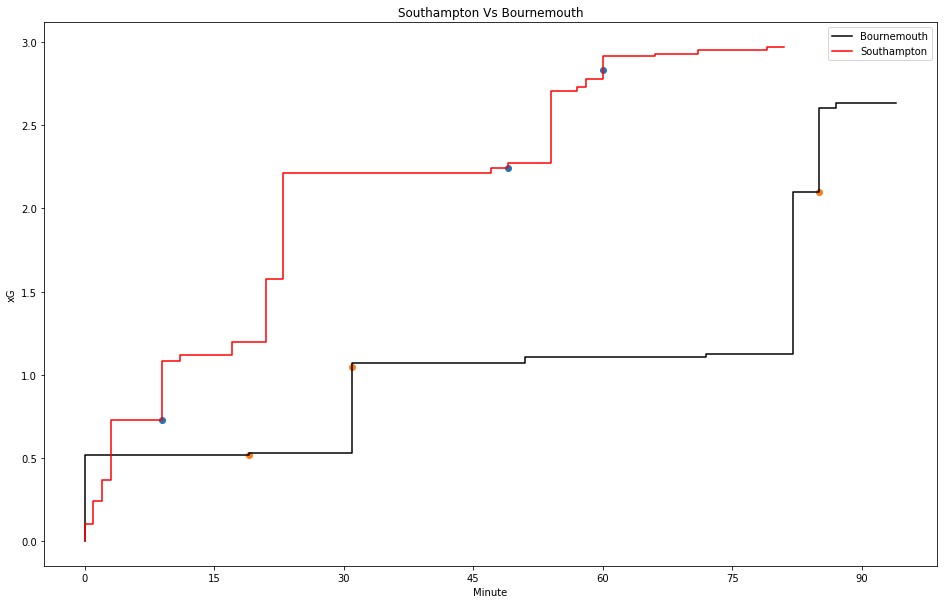

In [17]:
# Desain figure
fig, ax = plt.subplots(figsize=(16,10))
plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute')
plt.ylabel('xG')
plt.title('Southampton Vs Bournemouth')

# visualisasikan data pada figure
plt.scatter(x=h_goal_time,y=h_goal)
plt.scatter(x=a_goal_time,y=a_goal)
        
ax.step(x=a_time, y=a_cumulative, color='black', label=ateam)
ax.step(x=h_time, y=h_cumulative, color='red', label=hteam)
ax.legend()